# Ultimate Data Science Challenge

### Completed by: Nicholas Roller

# Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
L = open('logins.json',)

In [3]:
logins = json.load(L)

In [4]:
logins

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [5]:
df = pd.DataFrame(logins)

In [6]:
df['count']=1

In [7]:
df.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [8]:
df.dtypes

login_time    object
count          int64
dtype: object

In [9]:
df['login_time'] = pd.to_datetime(df['login_time'],infer_datetime_format=False)

In [10]:
df.dtypes

login_time    datetime64[ns]
count                  int64
dtype: object

In [11]:
df=df.set_index('login_time')

In [12]:
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [13]:
df.shape

(93142, 1)

In [14]:
df_15 = df.resample('15T').sum()
df_15

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [15]:
df_15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


Text(0, 0.5, 'Login Count per 15 Minutes')

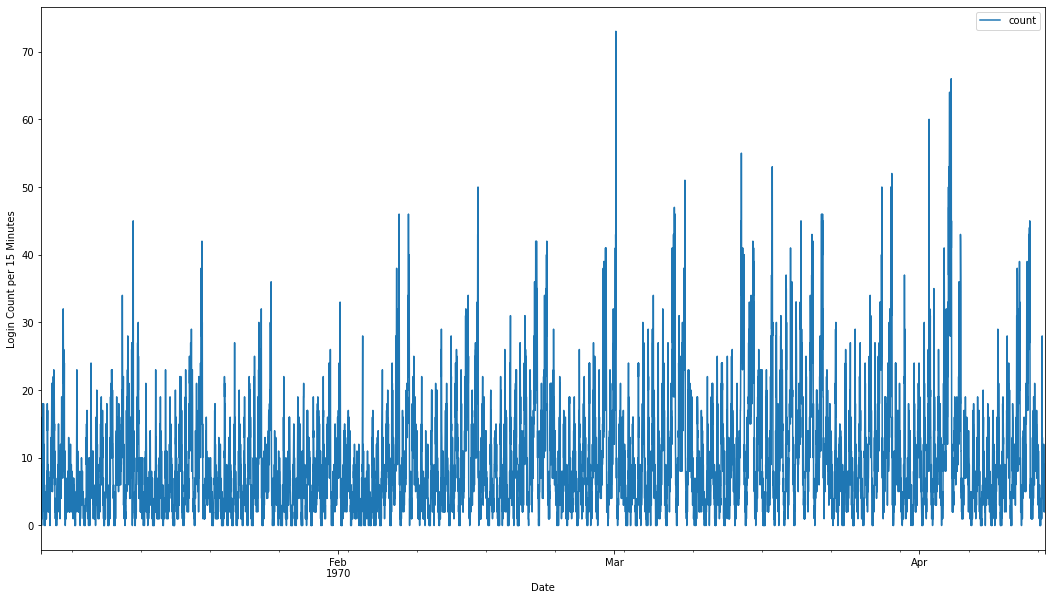

In [16]:
plt.rcParams["figure.figsize"] = (18,10)
ax=df_15.plot(kind='line')
ax.set_xlabel('Date')
ax.set_ylabel('Login Count per 15 Minutes')

Our plot is very cluttered, even with the 15 minute aggregation, so we will plot the rolling mean using 96 intervals since there are 96 15-minute intervals per day, give us a rolling daily average of login counts.

Text(0, 0.5, 'Daily rolling mean of login counters per 15 minutes')

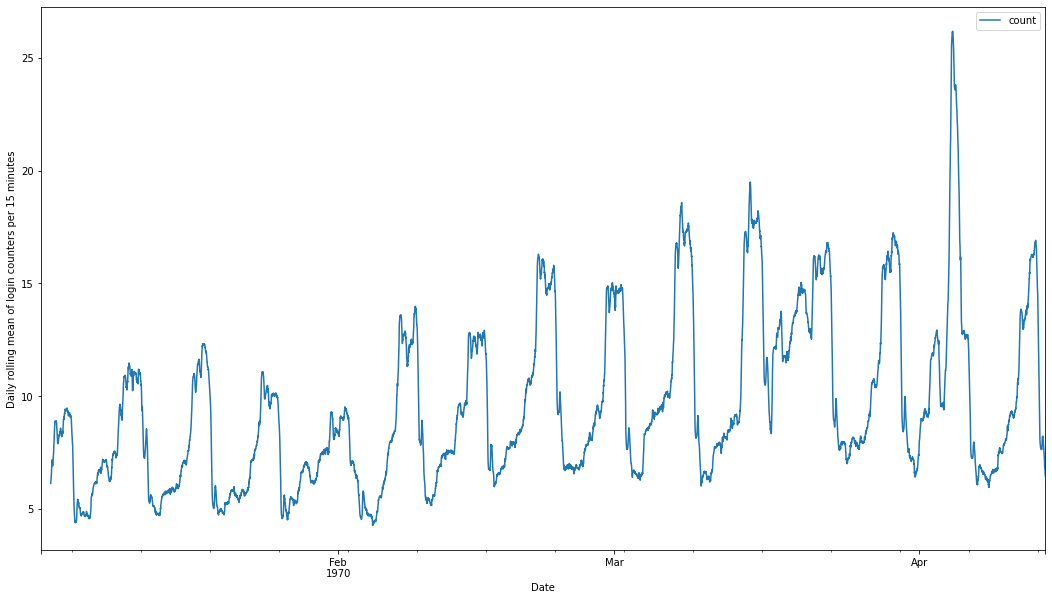

In [17]:
df_15_mean = df_15.rolling(window=96).mean()
ax=df_15_mean.plot(figsize=(18,10))
ax.set_xlabel('Date')
ax.set_ylabel('Daily rolling mean of login counters per 15 minutes')

We can now clearly see our login cout displays seasonality, and possibly a slight upward trend overtime. The magnitude of these spikes is certainly increasing over time as well. At first glance, our time series appears to be stationary. We will test for stationarity with the adfuller test.

In [18]:
from statsmodels.tsa.stattools import adfuller
#run adfuller on df_15 to test for stationarity
results=adfuller(df_15)
print(results)

(-10.337954309060457, 2.7323966542228277e-18, 38, 9749, {'1%': -3.431020942932955, '5%': -2.8618365160244372, '10%': -2.5669278303551253}, 56368.34584451129)


According to adfuller test results, the p-value is not below our threshold for P=0.05 and thus we assume the null-hypothesis holds that the time series is stationary.

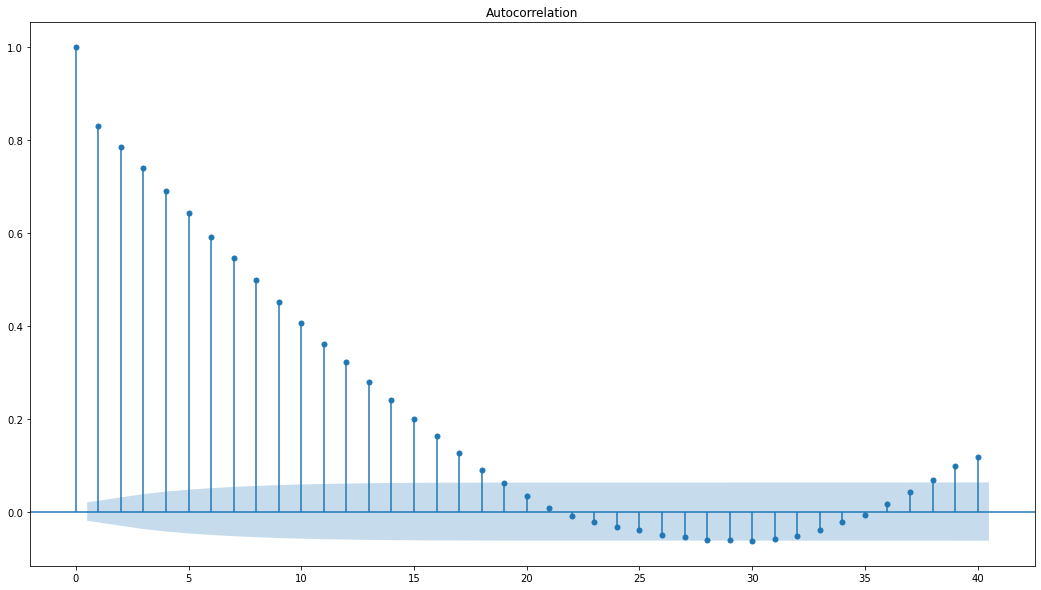

In [19]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(df_15, lags=40)

According to our ACF plot, there seems to be strong correlation up through the 18th lag in our data.

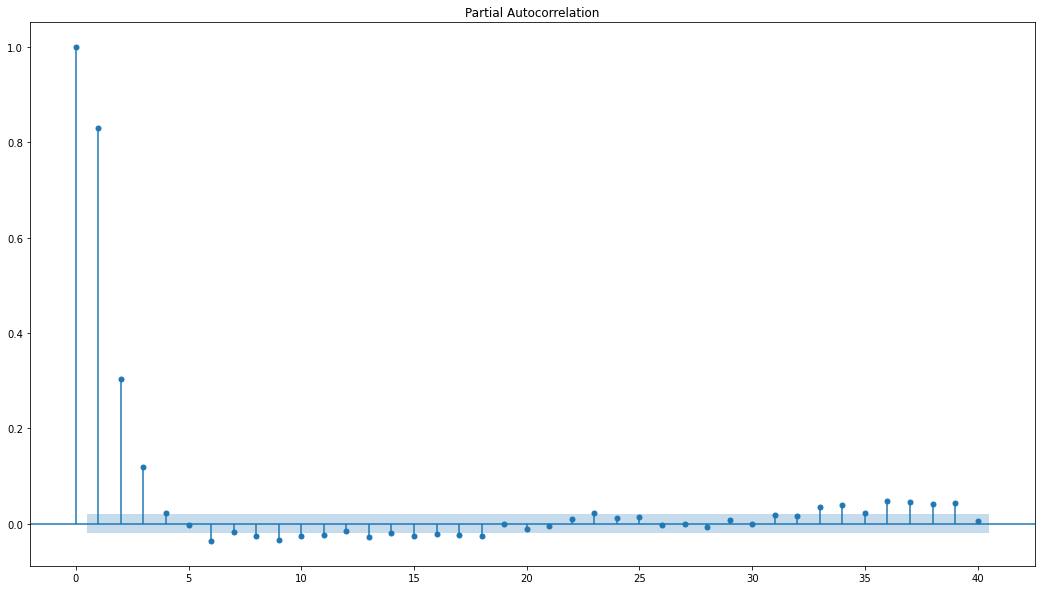

In [20]:
fig = tsaplots.plot_pacf(df_15, lags=40)

<AxesSubplot:>

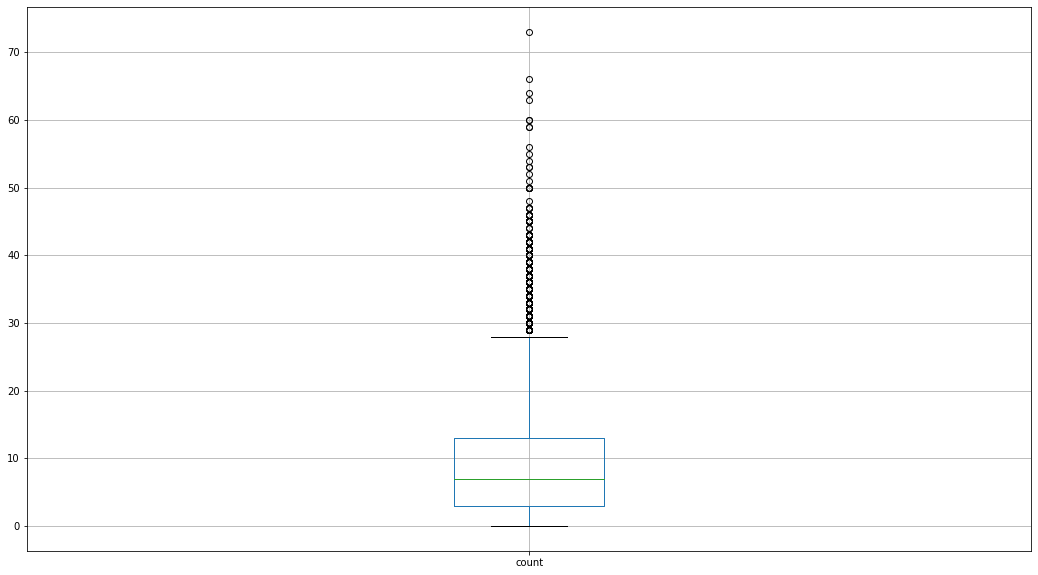

In [21]:
df_15.boxplot()

Our box plot shows a large number of outliers.

<AxesSubplot:ylabel='Density'>

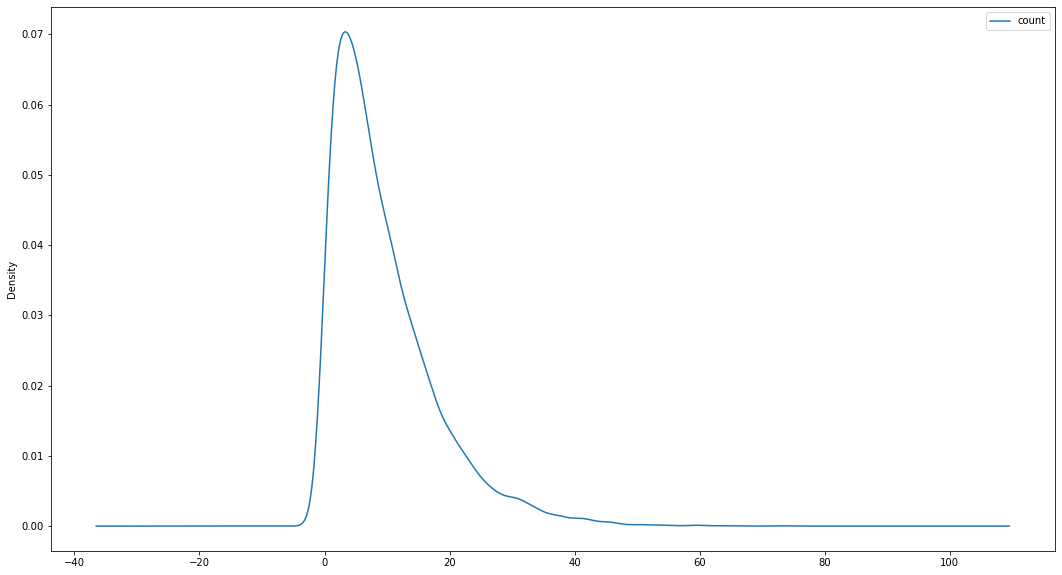

In [22]:
df_15.plot(kind='density')

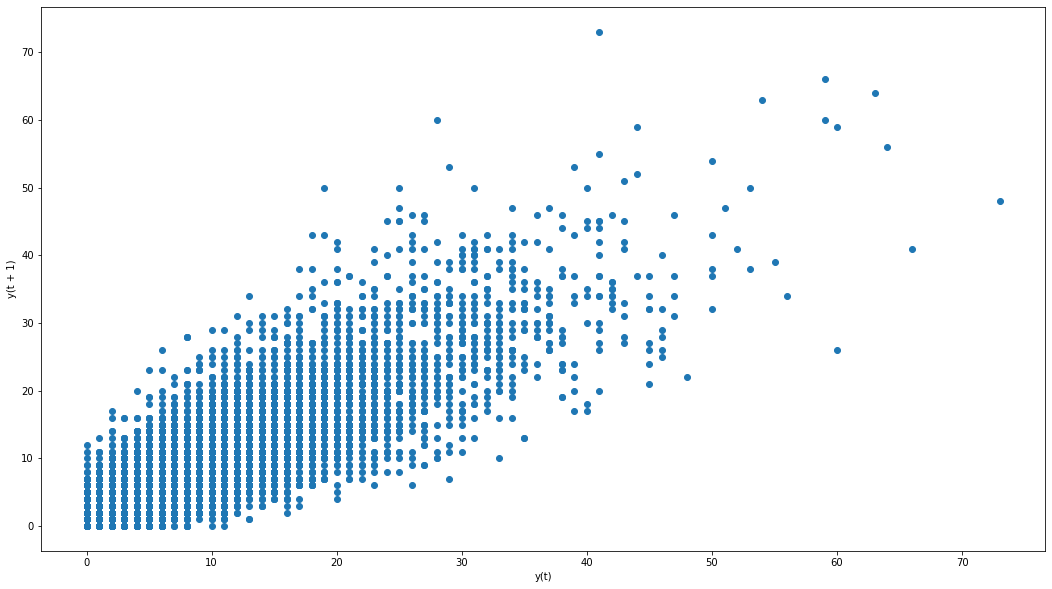

In [23]:
from pandas.plotting import lag_plot

lag_plot(df_15)
plt.show()

From the lag plot above, we can see there is a fairly strong correlation bet t and t+1 lag

In [24]:
df_15.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')

In [25]:
df_15.index.dayofweek

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='login_time', length=9788)

In [26]:
df_15_hourly = df_15.groupby(df_15.index.hour).mean()

Text(0.5, 1.0, 'Hourly Login Averages Per Day')

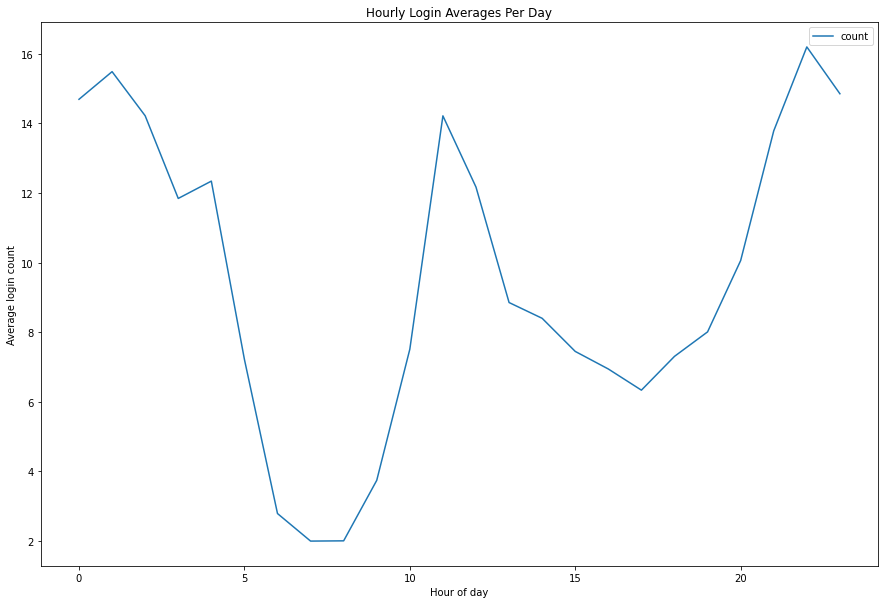

In [27]:
ax = df_15_hourly.plot(figsize=(15,10))
ax.set_xlabel('Hour of day')
ax.set_ylabel('Average login count')
ax.set_title('Hourly Login Averages Per Day')

Looking at the hourly login counts throughout the average day, we can see two distinct peaks and troughs. Login counts spike around noon and midnight, with troughs roughly even spread in between. 

Text(0.5, 1.0, 'Login Count Averages Per Day of Week')

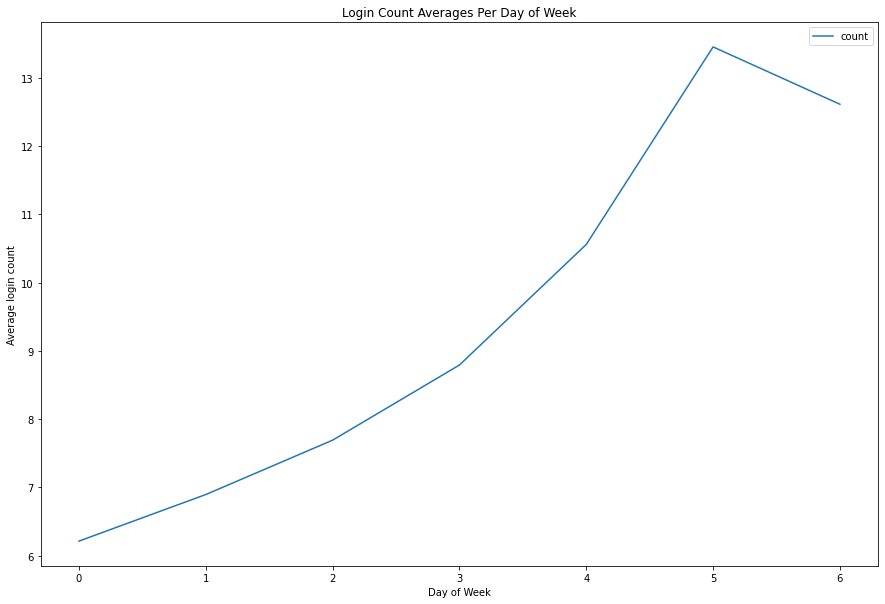

In [28]:
df_15_weekly = df_15.groupby(df_15.index.dayofweek).mean()
ax = df_15_weekly.plot(figsize=(15,10))
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average login count')
ax.set_title('Login Count Averages Per Day of Week')

Interestingly here we observe an increase of logins throughout the week, which a much larger portion being on Friday.

Text(0.5, 1.0, 'Daily Login Averages Per Month')

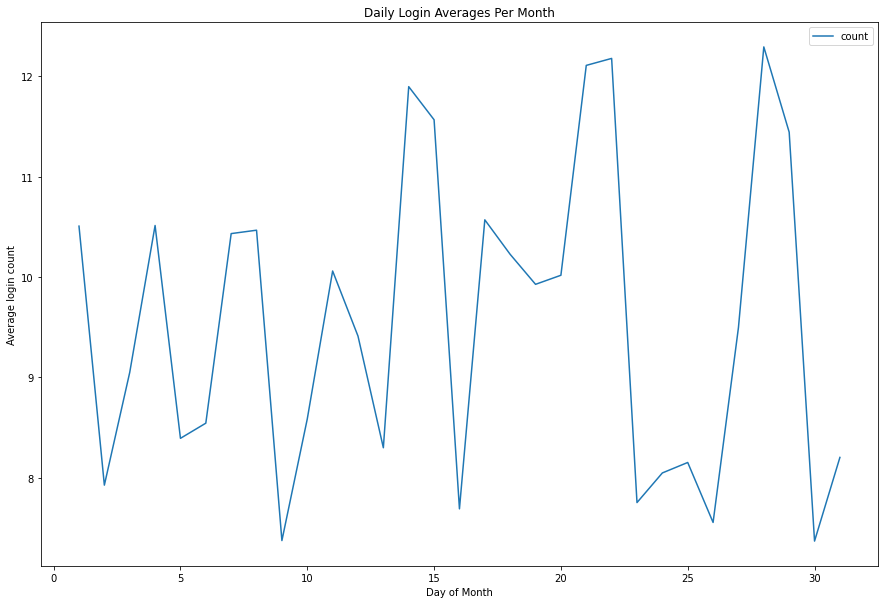

In [29]:
df_15_daily = df_15.groupby(df_15.index.day).mean()
ax = df_15_daily.plot(figsize=(15,10))
ax.set_xlabel('Day of Month')
ax.set_ylabel('Average login count')
ax.set_title('Daily Login Averages Per Month')

# Part 2

## Part 3

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [31]:
c = open("ultimate_data_challenge.json")

In [32]:
chal = json.load(c)

In [33]:
c_data = pd.DataFrame(chal)

In [34]:
c_data.head(20)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [35]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [36]:
c_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [37]:
c_data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

We have a decent number of missing values across several features. We will be imputing these missing values with the medians.

In [38]:
c_data = c_data.fillna(c_data.median())

In [39]:
c_data.isnull().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64

The categorical variable phones are listed as strings, we should one-hot encode them to be more easily handled. Then we will impute the missing values with the most common phone type.

In [40]:
c_data['phone'].describe()

count      49604
unique         2
top       iPhone
freq       34582
Name: phone, dtype: object

In [41]:
c_data['phone'] = c_data.fillna('iPhone')

In [42]:
c_data.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [43]:
#one-hot encode phone variable
c_data['phone']=pd.get_dummies(c_data['phone'])

In [44]:
dummies = pd.get_dummies(c_data['city'])


In [45]:
c_data = pd.concat([c_data,dummies],axis=1)

In [46]:
c_data = c_data.drop('city',axis=1)

In [47]:
c_data.head(10)

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,0,15.4,True,46.2,3.67,5.0,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,1,0.0,False,50.0,8.26,5.0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,False,100.0,0.77,5.0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,0,20.0,True,80.0,2.36,4.9,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,0,11.8,False,82.4,3.13,4.9,0,0,1
5,2,2014-01-09,3.5,1.00,2014-06-06,0,0.0,True,100.0,10.56,5.0,0,0,1
6,1,2014-01-24,4.9,1.00,2014-01-25,1,0.0,False,100.0,3.95,4.0,1,0,0
7,2,2014-01-28,5.0,1.00,2014-01-29,0,0.0,False,100.0,2.04,5.0,0,0,1
8,2,2014-01-21,4.5,1.00,2014-02-01,0,0.0,False,100.0,4.36,5.0,0,0,1
9,1,2014-01-03,4.9,1.00,2014-01-05,0,0.0,False,0.0,2.37,5.0,0,0,1


We need to convert the two date columns to dattime formats.

In [48]:
c_data['signup_date']=pd.to_datetime(c_data['signup_date'], infer_datetime_format=True)
c_data['last_trip_date']=pd.to_datetime(c_data['last_trip_date'], infer_datetime_format=True)

In [49]:
c_data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,0,15.4,True,46.2,3.67,5.0,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,1,0.0,False,50.0,8.26,5.0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,False,100.0,0.77,5.0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,0,20.0,True,80.0,2.36,4.9,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,0,11.8,False,82.4,3.13,4.9,0,0,1


In [50]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   phone                   50000 non-null  uint8         
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    50000 non-null  float64       
 11  Astapor                 50000 non-null  uint8         
 12  King's Landing          50000 non-null  uint8 

In [52]:
c_data['days_active']=c_data['last_trip_date']-c_data['signup_date']

In [53]:
c_data.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,days_active
0,4,2014-01-25,4.7,1.10,2014-06-17,0,15.4,True,46.2,3.67,5.0,0,1,0,143 days
1,0,2014-01-29,5.0,1.00,2014-05-05,1,0.0,False,50.0,8.26,5.0,1,0,0,96 days
2,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,False,100.0,0.77,5.0,1,0,0,1 days
3,9,2014-01-10,4.6,1.14,2014-06-29,0,20.0,True,80.0,2.36,4.9,0,1,0,170 days
4,14,2014-01-27,4.4,1.19,2014-03-15,0,11.8,False,82.4,3.13,4.9,0,0,1,47 days


In [54]:
#setting 150 days as our threshhold for being active, means they took a trip more than 5 months after their signup date.
c_data['retained'] = np.where(c_data['days_active']>= '150 days', True, False)

In [55]:
c_data['ultimate_black_user']=c_data['ultimate_black_user'].astype(int)
c_data['retained']=c_data['retained'].astype(int)
c_data = c_data.drop(['signup_date','last_trip_date','days_active'],axis=1)
c_data.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,retained
0,4,4.7,1.10,0,15.4,1,46.2,3.67,5.0,0,1,0,0
1,0,5.0,1.00,1,0.0,0,50.0,8.26,5.0,1,0,0,0
2,3,4.3,1.00,1,0.0,0,100.0,0.77,5.0,1,0,0,0
3,9,4.6,1.14,0,20.0,1,80.0,2.36,4.9,0,1,0,1
4,14,4.4,1.19,0,11.8,0,82.4,3.13,4.9,0,0,1,0


In [91]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   phone                   50000 non-null  uint8  
 4   surge_pct               50000 non-null  float64
 5   ultimate_black_user     50000 non-null  int32  
 6   weekday_pct             50000 non-null  float64
 7   avg_dist                50000 non-null  float64
 8   avg_rating_by_driver    50000 non-null  float64
 9   Astapor                 50000 non-null  uint8  
 10  King's Landing          50000 non-null  uint8  
 11  Winterfell              50000 non-null  uint8  
 12  retained                50000 non-null  int32  
dtypes: float64(6), int32(2), int64(1), uint8(4)
memory usage: 3.2 MB


C:\Users\nicho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retained', ylabel='count'>

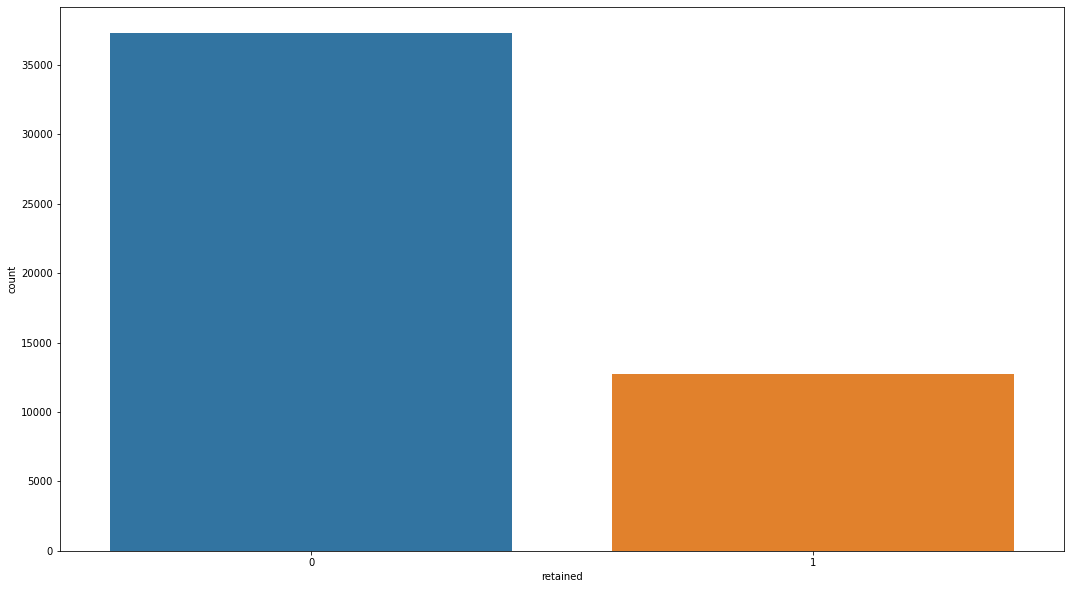

In [94]:
sns.countplot(c_data['retained'])

In [96]:
c_data['retained'].value_counts()

0    37286
1    12714
Name: retained, dtype: int64

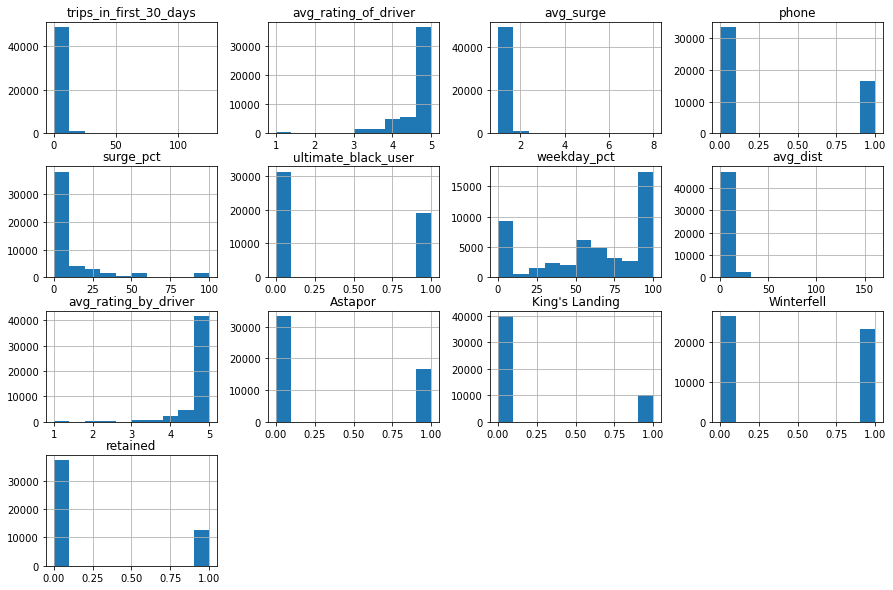

In [104]:
c_data.hist(figsize=(15,10))
plt.show()

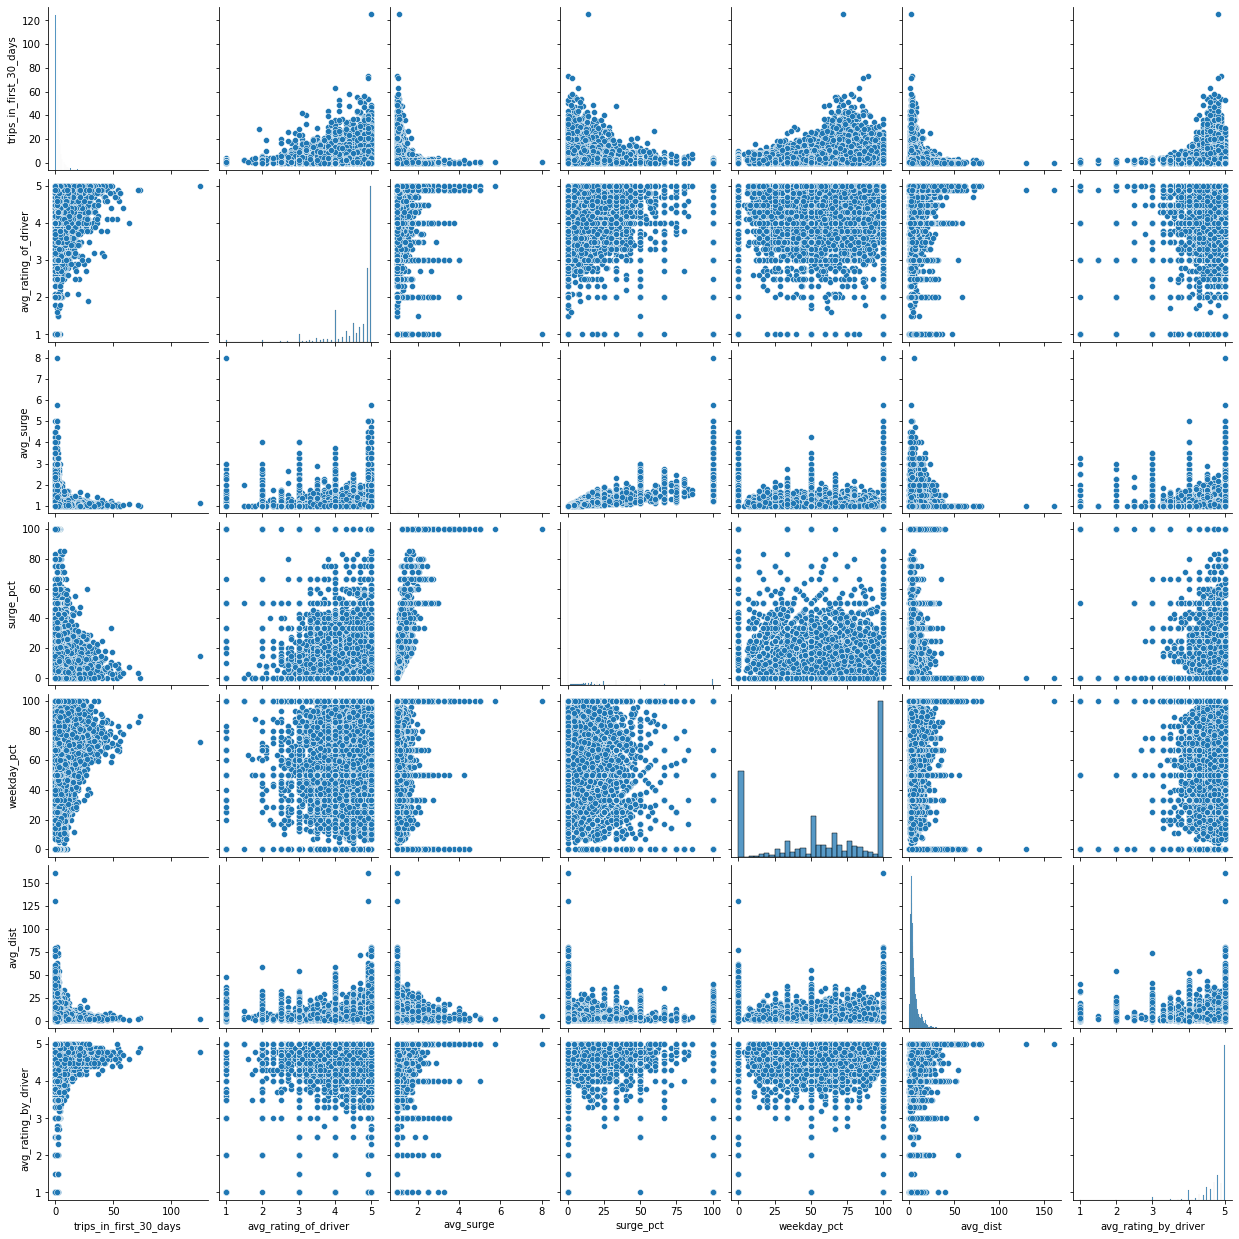

In [102]:
c_data_pairplot = c_data.drop(['phone','Astapor',"King's Landing",'Winterfell','retained','ultimate_black_user'], axis=1)
sns.pairplot(c_data_pairplot, palette='Set1')
plt.show()

<AxesSubplot:>

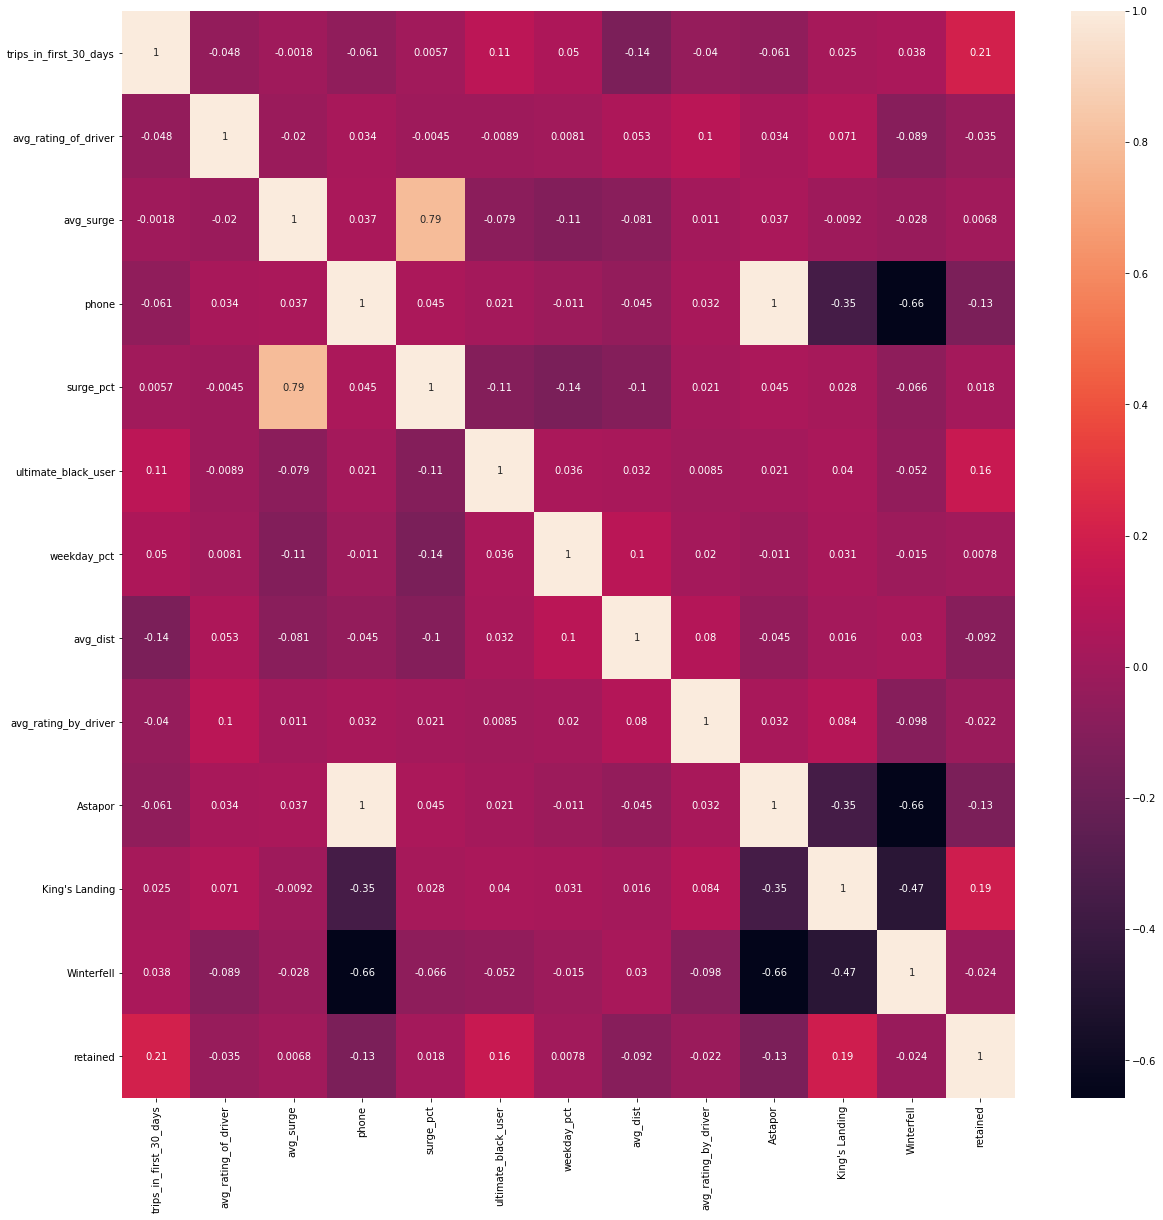

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(c_data.corr(), annot=True)

In [59]:
y = c_data['retained']
X = c_data.drop('retained', axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [61]:
y_test.shape, y_train.shape

((15000,), (35000,))

In [62]:
X_train.shape, X_test.shape

((35000, 12), (15000, 12))

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [64]:
model.fit(X_train,y_train)

LogisticRegression()

In [66]:
predictions = model.predict(X_test)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86     11218
           1       0.58      0.16      0.25      3782

    accuracy                           0.76     15000
   macro avg       0.68      0.56      0.55     15000
weighted avg       0.72      0.76      0.70     15000



In [76]:
model.score(X_test,y_test), model.score(X_train,y_train)

(0.7589333333333333, 0.7584571428571428)

In [78]:
y_pred = model.predict_proba(X_test)

In [80]:
model.get_params

<bound method BaseEstimator.get_params of LogisticRegression()>

In [82]:
from sklearn.model_selection import GridSearchCV

params = {'C':[0.001, 0.1, 1, 10, 100]}
clf=LogisticRegression()
clf_cv = GridSearchCV(clf, param_grid=params, cv=5, scoring ='accuracy')
clf_cv.fit(X_train,y_train)
clf_cv.best_params_, clf_cv.best_score_

C:\Users\nicho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nicho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

({'C': 0.1}, 0.7583142857142857)

In [84]:
model = LogisticRegression(C=0.1)

In [85]:
model.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [86]:
predictions = model.predict(X_test)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86     11218
           1       0.58      0.16      0.25      3782

    accuracy                           0.76     15000
   macro avg       0.68      0.56      0.55     15000
weighted avg       0.72      0.76      0.70     15000



In [88]:
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [89]:
y_pred = svm.predict(X_test)

In [107]:
svm.score(X_test,y_test), svm.score(X_train, y_train)

(0.7570666666666667, 0.7572857142857143)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86     11218
           1       0.63      0.09      0.16      3782

    accuracy                           0.76     15000
   macro avg       0.69      0.54      0.51     15000
weighted avg       0.73      0.76      0.68     15000

